In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# printing graph
def comparativeBar(include=["cpu"], color=['red'], width=0.35, title="Comparative", ld={'cpu':20}):
    # graph param load
    itms = len(include)
    ind = np.arange(itms)
    plt.axes([0, 0.6, 2, 2])
    leg = list(ld.keys())

    # incrementing width
    incWidth = -width
    xtimes=0

    # data access
    # reset temp buf
    load = []

    # seeking data
    for keyy, eachh in ld.items():
        if keyy in include:
            load.append(np.array(eachh))

    # prepping plot section
    incWidth += width
    xtimes += 1
    plt.bar(ind+incWidth, load, width, label='test')

    plt.ylabel('Charge MicroAh')
    plt.title(title)
    plt.grid(True)

    plt.xticks(ind + incWidth / xtimes, include)
    plt.legend(loc='best')
    plt.show()
    
#data filter
def dataFilter(data=None, cols=None):
    # target questions
    qs = ['Q1.', 'Q3.', 'Q7.', 'Q8.', 'Q10.']

    # buffer question of interest
    buf = []

    # column heads
    for each in qs:
        #get questions of interest in the distribution
        for eachh in cols:
            if each in eachh:
                buf.append(eachh)

    # get unique divisions per group
    dist = {}
    for each in buf:
        # discover groups per question
        if each not in dist.keys():
            dist[each] = {}
            tmp = data[each].unique().tolist()

            # pass tmp as keys
            for group in tmp:
                dist[each][group] = data.loc[data[each] == group, each].count()

    return dist

In [2]:
#smilarity measure
import math
import operator

def op(st=None, st1=None, rate=0.6):
    if st is not None and st1 is not None:
        st = st.lower()
        st1 = st1.lower()
        
        if len(st) > len(st1):
            sh = st1
            lo = st
        else:
            sh = st
            lo = st1
            
        #processing comparison
        found = 0
        count = 0
        miss = 0
        for each in lo:
            if count is len(sh): break
            if each is sh[count]:
                found += 1
                count += 1
            else:
                miss += 1
            
        #print (sh, '=>', lo)
        #print (found, miss, len(sh))
        #score = found/miss
        #print ('score %f' %(score))
        # print (math.log(score))
        # scaled score
        sscore = found/len(sh)
        #print ('ratio ', sscore)
        #print ('_\n')
        
        #return true if scaled score is > (0.6)~ rate
        if sscore > rate:
            return True
        else:
            return False
    else:
        print('Invalid inputs')

In [3]:
data = pd.read_excel('../data/data.xlsx')

In [4]:
data.head()

,Timestamp,Q1. Please choose the closest market region that applies to you?,Q2. How many devices do you acquire mobile data for?,Q3. What is your primary reason for acquiring mobile data?,Q4. Roughly how many apps are most used on your device(s)?,"Q5. How many of those Apps are Utility Apps such as Mobile Banking, Online shopping?","Q6. Please list some of the Utility Apps, for the previous question Q5, that you frequently use? Try to rank them starting with the most important.",Q7. How often do you reload/renew your mobile data plan?,"Q8. Select the Quantity of data mostly acquire for the period selected in the previous question, Q7?",Q9. How long in days does the acquired data bundle roughly last i.e. before depletion?,Q10. How long does it take before reloading your mobile data plan after depletion?
0,2019-10-15 07:45:12.875,Africa,2,General Browsing,9,3,"Safaricom app, kcb app",Irregular,1GB to 3GB,28.0,Several Days
1,2019-10-16 05:46:07.513,Africa,2,Social Media,6,1,Whatsapp \nGmail \nInstagram \nJumia\nCBA LOOP,Monthly,Over 5GB,21.0,Automatic reload 0 hours
2,2019-10-16 06:10:13.426,Asia,2,"Utility Apps i.e Mobile Banking, Online Shoppi...",7,3,NaN,Monthly,Over 5GB,30.0,A few Hours
3,2019-10-16 06:14:36.755,Africa,2,General Browsing,5,2,"Banking App, Programming up",Daily,1GB to 3GB,1.0,Automatic reload 0 hours
4,2019-10-16 06:31:06.885,Africa,4,General Browsing,3,0,None,Monthly,Over 5GB,27.0,Several Days


In [5]:
cols = data.columns

In [6]:
for each in cols:
    print(each)
    print (data.loc[data[cols[1]] == "Africa", each])
    break
    

Timestamp
0     2019-10-15 07:45:12.875
1     2019-10-16 05:46:07.513
3     2019-10-16 06:14:36.755
4     2019-10-16 06:31:06.885
5     2019-10-16 06:48:37.714
6     2019-10-16 06:55:05.328
7     2019-10-16 07:56:39.648
9     2019-10-16 08:57:11.852
10    2019-10-16 09:05:33.466
11    2019-10-16 09:11:16.144
12    2019-10-16 09:15:58.534
13    2019-10-16 09:24:52.337
14    2019-10-16 09:32:22.862
16    2019-10-16 10:10:37.861
17    2019-10-16 10:18:43.596
21    2019-10-16 13:05:44.633
23    2019-10-16 15:09:54.650
24    2019-10-16 16:24:48.762
26    2019-10-16 21:46:25.285
29    2019-10-17 05:10:22.950
36    2019-10-17 05:50:28.726
37    2019-10-17 06:07:38.992
38    2019-10-17 06:19:40.008
39    2019-10-17 06:20:00.100
40    2019-10-17 06:21:07.077
41    2019-10-17 06:22:23.094
42    2019-10-17 06:27:06.671
44    2019-10-17 06:29:31.467
45    2019-10-17 06:32:25.013
46    2019-10-17 06:36:06.663
                ...          
201   2019-11-14 16:51:41.614
202   2019-11-15 01:28:12.366


In [7]:
print (cols[1])
data.loc[data[cols[1]] == "Africa", each].iloc[4]

Q1. Please choose the closest market region that applies to you?


Timestamp('2019-10-16 06:48:37.714000')

In [8]:
data.loc[data[cols[1]] == "Africa", each].count()

199

In [9]:
# target questions
qs = ['Q1.', 'Q3.', 'Q7.', 'Q8.', 'Q10.']

# buffer question of interest
buf = []

# column heads
for each in qs:
    #get questions of interest in the distribution
    for eachh in cols:
        if each in eachh:
            buf.append(eachh)

# get unique divisions per group
dist = {}
for each in buf:
    # discover groups per question
    if each not in dist.keys():
        dist[each] = {}
        tmp = data[each].unique().tolist()
        
        # pass tmp as keys
        for group in tmp:
            dist[each][group] = data.loc[data[each] == group, each].count()

dist


{'Q1. Please choose the closest market region that applies to you?': {'Africa': 199,
  'Asia': 16,
  'European Union': 12,
  'Middle East': 2,
  'East Europe': 1,
  'North America': 1},
 'Q3. What is your primary reason for acquiring mobile data?': {'General Browsing': 146,
  'Social Media': 51,
  'Utility Apps i.e Mobile Banking, Online Shopping, etc': 34},
 'Q7. How often do you reload/renew your mobile data plan?': {'Irregular': 16,
  'Monthly': 81,
  'Daily': 103,
  'Weekly': 31},
 'Q8. Select the Quantity of data mostly acquire for the period selected in the previous question, Q7?': {'1GB to 3GB': 59,
  'Over 5GB': 53,
  '100MB to 250MB': 22,
  'Less than 100MB': 27,
  '250MB to 500MB': 20,
  '500MB to 1GB': 29,
  '3GB to 5GB': 21},
 'Q10. How long does it take before reloading your mobile data plan after depletion?': {'Several Days': 38,
  'Automatic reload 0 hours': 60,
  'A few Hours': 68,
  'A day': 65}}

In [10]:
#bar graph output
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# implementing a bar function
def comp(labels=('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp'), data=[10,8,6,4,2,1], title='', unit='usage'):
    #objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
    # labels
    objects = labels
    y_pos = np.arange(len(objects))
    
    #data
    performance = data

    plt.axes([0, 0.6, 1, 1])
    plt.bar(y_pos, performance, align='center', alpha=0.5, color='green')
    plt.xticks(y_pos, objects)

    # units measurement
    plt.ylabel(unit)

    # title
    plt.title(title)
    plt.grid(True)

    plt.show()
    
#filter lib
def plotQ(load = None, flt=None):
    if flt is not None and load is not None:
        for key, each in load.items():
            if flt in key:
                #print (key)
                labs = list(each.keys())
                vals = list(each.values())
                #print (labs, vals)
                comp(labels=labs, data=vals, unit='No. of People', title=key)
                #break
    else:
        print ('init load and flt appropriately')
    
#removing punctuation
def remPunc(string=''):
    newstr = string
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in string.lower():
        if x in punctuations:
            newstr = newstr.replace(x,"")
    return newstr
        
'''
for key, each in dist.items():
    #print (key)
    labs = list(each.keys())
    vals = list(each.values())
    #print (labs, vals)
    comp(labels=labs, data=vals, unit='No. of People', title=key)
    #break
        
#comparativeBar()
'''

"\nfor key, each in dist.items():\n    #print (key)\n    labs = list(each.keys())\n    vals = list(each.values())\n    #print (labs, vals)\n    comp(labels=labs, data=vals, unit='No. of People', title=key)\n    #break\n        \n#comparativeBar()\n"

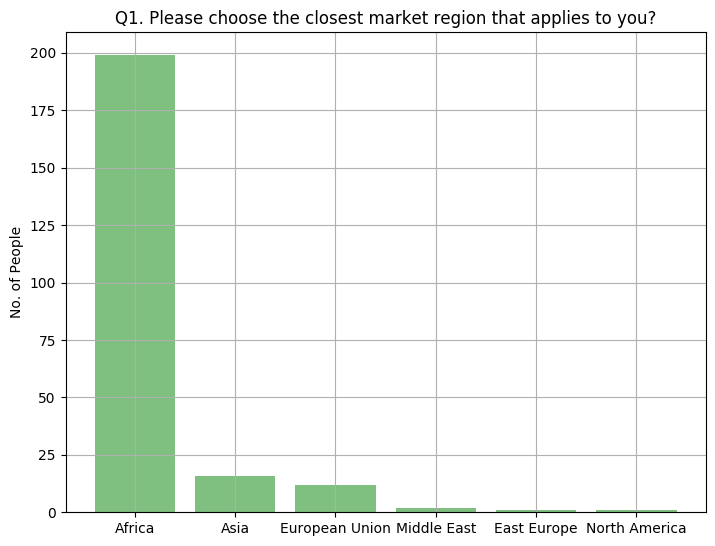

In [11]:
plotQ(dist, 'Q1.')

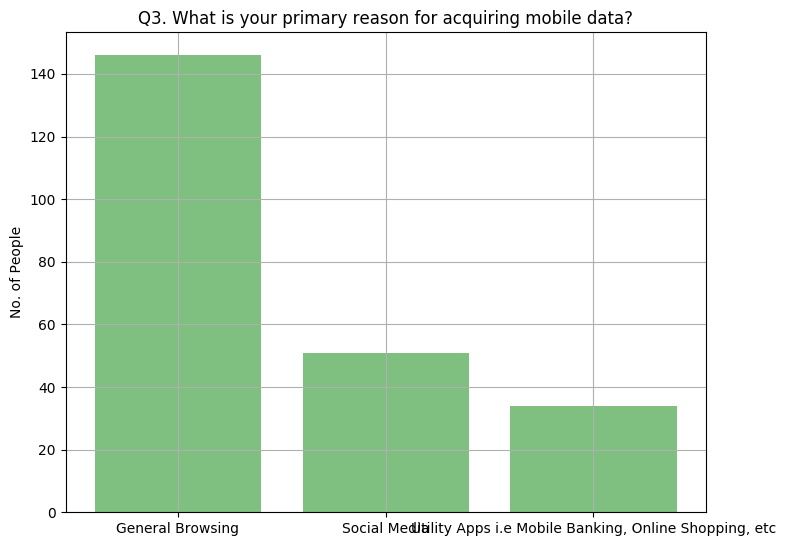

In [12]:
plotQ(dist, 'Q3.')

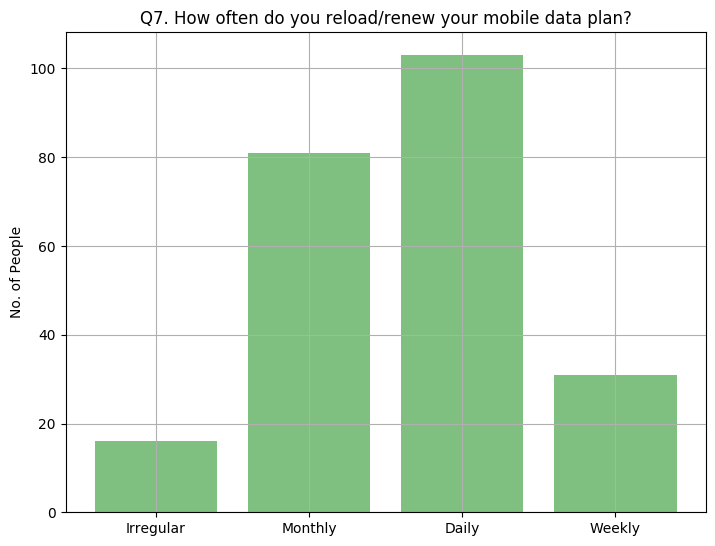

In [13]:
plotQ(dist, 'Q7.')

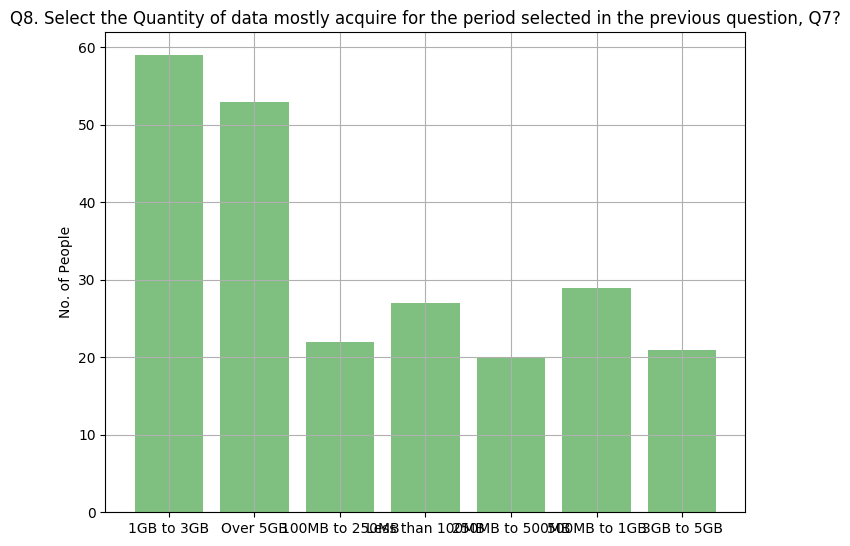

In [14]:
plotQ(dist, 'Q8.')

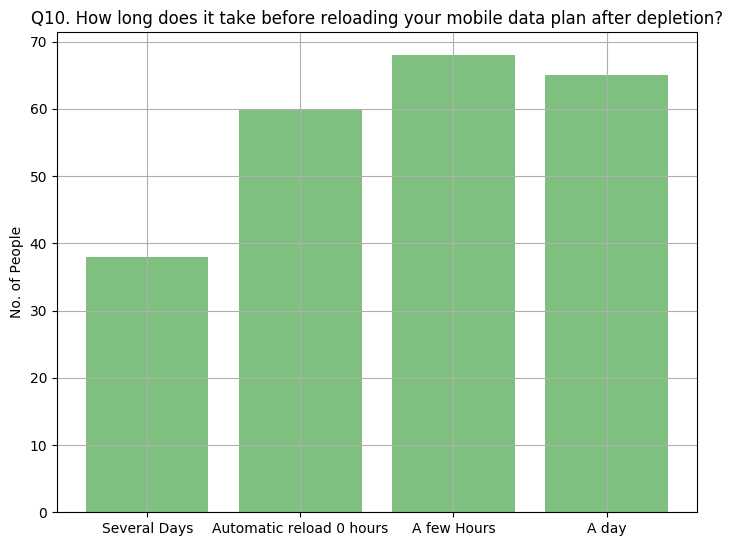

In [15]:
plotQ(dist, 'Q10.')

In [26]:
#finding and ranking utility Apps
# print(cols)
apps = data.loc[data[cols[1]] == "Africa", cols[6]].tolist()
#print (apps)
appFreq = {}
words = []


for each in apps:
    #print (each)
    #print (type(each))
    if each is 'None' or each is None or each is 'nan' or isinstance(each, float) or isinstance(each, int):
        tmp = ['gabage']
    elif "\n" in each:
        tmp = each.split('\n')
        #print (tmp)
    elif "," in each:
        tmp = each.split(',')
        #print (tmp)
        
    #load apps
    for ap in tmp:
        s = ap.strip()
        if s not in appFreq.keys():
            appFreq[s] = 1
        else:
            appFreq[s] += 1
            
    #secondary filter
    for ap in tmp:
        #print (ap)
        s = ap.strip()
        #print (type(s))
        #print(s)
        if "\n" in s:
            tmps = s.split('\n')            
        elif "," in s:
            tmps = s.split(',')
        else:
            tmps = None
            
        if tmps is None:
            tmps = s.split(' ')
            for sth in tmps:
                words.append(sth.lower())
        else:
            for sth in tmps:
                x = sth.split(' ')
                for sthh in x:
                    words.append(sthh.lower())
            

wordFreq = {}
exclude = ['app', '']
for each in words:
    if each is not "":
        #removing punctuation and evaluation
        tmp = remPunc(each)
        match = None
        
        for every in wordFreq.keys():
            if op(every, each, 0.7) is True:
                match = every
                   
        if match is None:
            if tmp in wordFreq:
                wordFreq[tmp] += 1
            else:
                wordFreq[tmp] = 1
        else:
            wordFreq[match] += 1
        
print(len(wordFreq))

order = sorted(wordFreq.items(), key=operator.itemgetter(1))
order

113


[('ntsa', 1),
 ('chatting', 1),
 ('finery', 1),
 ('shopstyle', 1),
 ('poshmark', 1),
 ('zara', 1),
 ('senti', 1),
 ('uba', 1),
 ('messages', 1),
 ('swvl', 1),
 ('scrabble', 1),
 ('bolt', 1),
 ('fpl', 1),
 ('netflix', 1),
 ('yoga', 1),
 ('opesa', 1),
 ('telegram', 1),
 ('kit', 1),
 ('premise', 1),
 ('goodle', 1),
 ('30', 1),
 ('gps', 1),
 ('xclub', 1),
 ('brave', 1),
 ('business', 1),
 ('jiji', 1),
 ('futmob', 1),
 ('force', 1),
 ('fuzu', 1),
 ('brighter', 1),
 ('alfalafa', 1),
 ('nairobi', 1),
 ('epayment', 1),
 ('power', 1),
 ('geopoll', 1),
 ('mula', 1),
 ('marketing', 1),
 ('transfer', 1),
 ('eco', 1),
 ('bitcoin', 1),
 ('azzypay', 1),
 ('eazypay', 1),
 ('programming', 2),
 ('phone', 2),
 ('ebay', 2),
 ('2', 2),
 ('chipper', 2),
 ('those', 2),
 ('two', 2),
 ('news', 2),
 ('nic', 2),
 ('apk', 2),
 ('viusasa', 2),
 ('mozzilla', 2),
 ('tool', 2),
 ('office', 2),
 ('kenya', 2),
 ('pesapal', 2),
 ('council', 2),
 ('linkedin', 2),
 ('beting', 2),
 ('mshwari', 3),
 ('chrome', 3),
 ('maps',

In [17]:
apps

['Safaricom app, kcb app',
 'Whatsapp \nGmail \nInstagram \nJumia\nCBA LOOP',
 'Banking App, Programming up',
 'None',
 nan,
 nan,
 'Browser',
 'NTSA, equity, co-op bank,safaricom',
 'Safaricom app\nKCB mobile banking',
 'Equity,coop,jumia',
 nan,
 'Jumia',
 1,
 'Instagram, kcb mobile banking, safe boda, YouTube ',
 'Equity Bank App, Jumia',
 nan,
 'Online banking, online chatting apps',
 'Jumia\nWish\nAmazon.com ',
 'Online banking, Phone',
 'None',
 'Coop bank app, jumia ',
 'Amazon, finery, thredUp, ebay, shopstyle, poshmark, zara',
 'Jumia\nKilimall\nFacebook',
 'Kilimall',
 "Kcb mpesa\nBarclay's\n",
 'Eazy banking',
 'Branch,kcb banking',
 'Jumia killimall ',
 'Jumia\nKCB',
 nan,
 'Branch,tala,okash,eazzy loans app and kopakash',
 'Branch, ubapesa, KCB bank app',
 '1.kcb mobile app\n2. Mpesa app',
 'Mshwari\nJumia',
 'Timiza, tala and senti apps',
 'Jumia \nMobile banking ',
 0,
 'Branch,jumuia,safaricom app',
 'WhatsApp\nChrome\nFacebook\nEquity Mobile banking\nYouTube',
 'Branch

In [18]:
       
st = 'wellington'
st1 = 'wellton'

op(st, st1)
op(st, 'ezzy')
op('choice', 'choosing')
op('choose', 'choosing')
print (op('flx', 'flex'))

True


In [19]:
# !python3 -m spacy download en
data[cols[0]].count()

newD = data.loc[data[cols[1]] == "Africa"]
newD = newD.loc[newD[cols[8]] == "1GB to 3GB"]
newD

,Timestamp,Q1. Please choose the closest market region that applies to you?,Q2. How many devices do you acquire mobile data for?,Q3. What is your primary reason for acquiring mobile data?,Q4. Roughly how many apps are most used on your device(s)?,"Q5. How many of those Apps are Utility Apps such as Mobile Banking, Online shopping?","Q6. Please list some of the Utility Apps, for the previous question Q5, that you frequently use? Try to rank them starting with the most important.",Q7. How often do you reload/renew your mobile data plan?,"Q8. Select the Quantity of data mostly acquire for the period selected in the previous question, Q7?",Q9. How long in days does the acquired data bundle roughly last i.e. before depletion?,Q10. How long does it take before reloading your mobile data plan after depletion?
0,2019-10-15 07:45:12.875,Africa,2,General Browsing,9,3,"Safaricom app, kcb app",Irregular,1GB to 3GB,28.0,Several Days
3,2019-10-16 06:14:36.755,Africa,2,General Browsing,5,2,"Banking App, Programming up",Daily,1GB to 3GB,1.0,Automatic reload 0 hours
5,2019-10-16 06:48:37.714,Africa,3,General Browsing,5,2,NaN,Daily,1GB to 3GB,2.0,Automatic reload 0 hours
12,2019-10-16 09:15:58.534,Africa,2,Social Media,6,0,NaN,Irregular,1GB to 3GB,3.0,A day
16,2019-10-16 10:10:37.861,Africa,3,"Utility Apps i.e Mobile Banking, Online Shoppi...",5,4,"Instagram, kcb mobile banking, safe boda, YouT...",Monthly,1GB to 3GB,20.0,Several Days
26,2019-10-16 21:46:25.285,Africa,2,"Utility Apps i.e Mobile Banking, Online Shoppi...",3,2,"Online banking, Phone",Monthly,1GB to 3GB,25.0,Several Days
29,2019-10-17 05:10:22.950,Africa,2,General Browsing,5,0,None,Daily,1GB to 3GB,1.0,A day
36,2019-10-17 05:50:28.726,Africa,2,"Utility Apps i.e Mobile Banking, Online Shoppi...",6,2,"Coop bank app, jumia",Weekly,1GB to 3GB,5.0,Automatic reload 0 hours
37,2019-10-17 06:07:38.992,Africa,3,"Utility Apps i.e Mobile Banking, Online Shoppi...",50,15,"Amazon, finery, thredUp, ebay, shopstyle, posh...",Daily,1GB to 3GB,1.0,Automatic reload 0 hours
39,2019-10-17 06:20:00.100,Africa,1,Social Media,3,1,Kilimall,Daily,1GB to 3GB,1.0,A day


In [20]:
dataFilter(newD, cols)

{'Q1. Please choose the closest market region that applies to you?': {'Africa': 45},
 'Q3. What is your primary reason for acquiring mobile data?': {'General Browsing': 30,
  'Social Media': 7,
  'Utility Apps i.e Mobile Banking, Online Shopping, etc': 8},
 'Q7. How often do you reload/renew your mobile data plan?': {'Irregular': 2,
  'Daily': 23,
  'Monthly': 11,
  'Weekly': 9},
 'Q8. Select the Quantity of data mostly acquire for the period selected in the previous question, Q7?': {'1GB to 3GB': 45},
 'Q10. How long does it take before reloading your mobile data plan after depletion?': {'Several Days': 6,
  'Automatic reload 0 hours': 11,
  'A day': 14,
  'A few Hours': 14}}

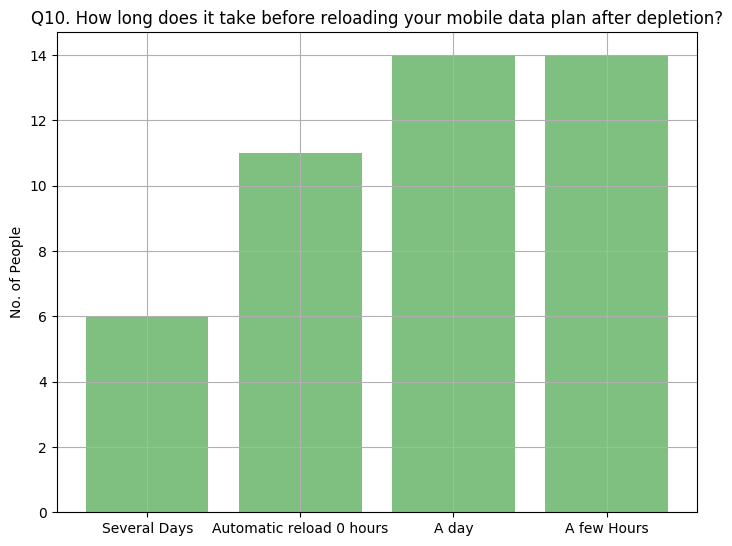

In [21]:
plotQ(dataFilter(newD, cols), 'Q10.')

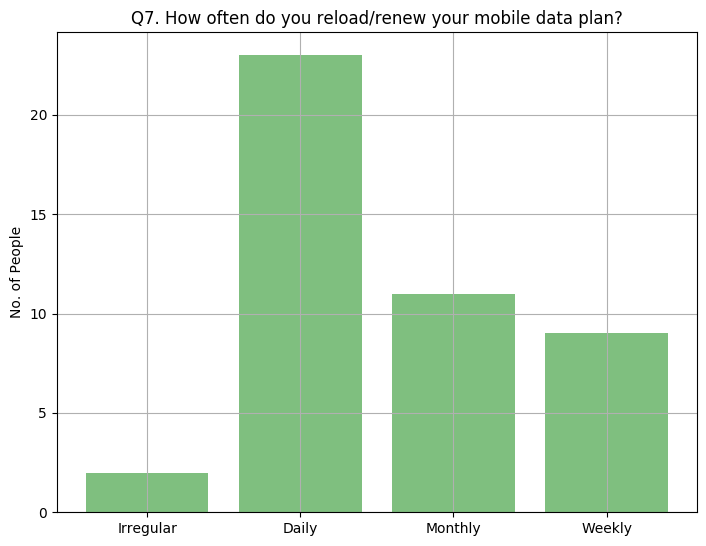

In [22]:
plotQ(dataFilter(newD, cols), 'Q7.')